## Task 2

- The Quarterly Census of Employment and Wages (QECW) dataset is provided by the US Bureau of Labor Statistics

- The files provided for year 2020 is split by county FIPS codes. I have pruned the FIPS codes outside the scope of COVID super dataset (nationwide, Puerto Rico etc.). Below is the code for merging these ~4,000 files into one dataset for easier processing. 

In [16]:
import pandas as pd
import os
directory = '2020.annual.by_area/'
df_employment = pd.DataFrame() # Init an empty dataframe
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df_next = pd.read_csv(f)
        df_employment = pd.concat([df_employment, df_next]) # merging each new file to the super 
df_employment.to_csv('2020.annual.employment.by_area.super.csv', index=False)

In [20]:
print(pd.read_csv('2020.annual.employment.by_area.super.csv'))

C:\Users\sheng\AppData\Local\Temp\ipykernel_45920\556342259.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  print(pd.read_csv('2020.annual.employment.by_area.super.csv'))


        area_fips  own_code industry_code  agglvl_code  size_code  year qtr  \
0            1000         0            10           50          0  2020   A   
1            1000         1            10           51          0  2020   A   
2            1000         1           102           52          0  2020   A   
3            1000         1          1021           53          0  2020   A   
4            1000         1          1022           53          0  2020   A   
...           ...       ...           ...          ...        ...   ...  ..   
3602755     US000         8            10           95          0  2020   A   
3602756     US000         9            10           94          0  2020   A   
3602757     USCMS         0            10           92          0  2020   A   
3602758     USMSA         0            10           91          0  2020   A   
3602759     USNMS         0            10           93          0  2020   A   

        disclosure_code                            

###  Reduced Variable Dictionary for QCEW Dataset

Referenced to full field descriptions found at: https://www.bls.gov/cew/about-data/downloadable-file-layouts/annual/naics-based-annual-layout.htm 


| Name                      | Description                                                            | Data Type | Possible Values |   |
|---------------------------|------------------------------------------------------------------------|-----------|-----------------|---|
| area_fips                 | 5-character FIPS code                                                  | Integer   | 01000 - 56999   |   |
| industry_code             | 6-character industry code (NAICS, SuperSector)                         | Text      |                 |   |
| year                      | 4-character year                                                       | Text      | 2020            |   |
| qtr                       | 1-character quarter                                                    | Text      | A, B, C, D      |   |
| total_annual_wages        | Sum of the four quarterly total taxable wage totals for a given year   | Numeric   |                 |   |
| oty_annual_avg_estabs_chg | Over-the-year change in annual average establishments for a given year | Numeric   |                 |   |

### Initial Hypothesis Questions​
    Was the spread of COVID 19 accelerated by certain type, density, locality of employment? ​

    Were industries, income, locality of employment negatively affected by the spread of COVID 19 when comparing data between 2020, 2021, 2022? ​

## Task 3

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

specific_rows = [0, 558] # Selecting lables and row 558 for Hawaii statewide data 
df = pd.read_csv('covid_super.csv', skiprows = lambda x: x not in specific_rows)
df.drop(df.loc[:,'2021-02-01_x':'2023-07-23_y'], axis=1, inplace=True) # dropping data from end of confirmed case Feb 2021 to end of dataset
df.drop(df.loc[:,'countyFIPS':'2020-11-01_x'], axis=1, inplace=True) # dropping data from first column to Nov 2020
print(df)

   2020-11-02_x  2020-11-03_x  2020-11-04_x  2020-11-05_x  2020-11-06_x  \
0          1304          1311          1332          1356          1375   

   2020-11-07_x  2020-11-08_x  2020-11-09_x  2020-11-10_x  2020-11-11_x  ...  \
0          1386          1405          1409          1413          1436  ...   

   2021-01-22_x  2021-01-23_x  2021-01-24_x  2021-01-25_x  2021-01-26_x  \
0          2113          2115          2122          2128          2129   

   2021-01-27_x  2021-01-28_x  2021-01-29_x  2021-01-30_x  2021-01-31_x  
0          2132          2139          2144          2151          2162  

[1 rows x 91 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

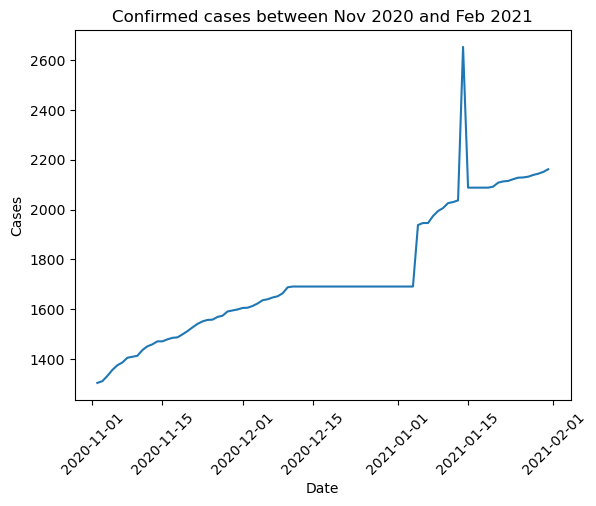

In [70]:
x = df.columns.values
x = [s[:-2] for s in x]
x = np.asarray(x, dtype='datetime64[s]')
y = df.loc[0].values

plt.title("Confirmed cases between Nov 2020 and Feb 2021")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Cases")
plt.plot(x, y)
plt.show

From the graph we can deduce that during this timeframe the number of confirmed cases is at a trend of increasing. 

Now we are going to attempt to merge the 2020 QCEW quarterly data of Hawaii with confirmed COVID cases of 2020 in Hawaii

<function matplotlib.pyplot.show(close=None, block=None)>

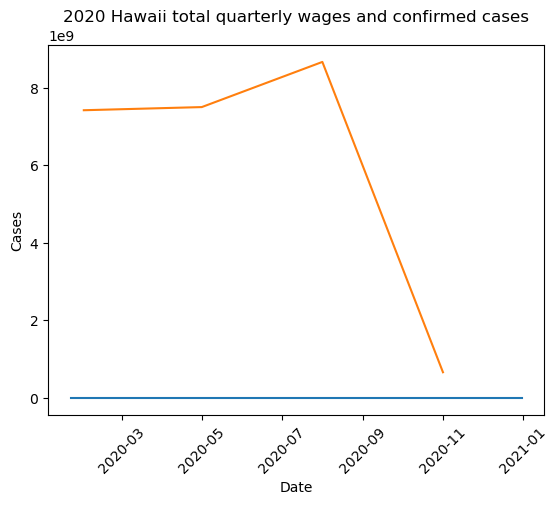

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

specific_rows = [0, 558]
df = pd.read_csv('covid_super.csv', skiprows = lambda x: x not in specific_rows)
df_columns = df.shape[1]
df.drop(df.loc[:,'2021-01-01_x':'2023-07-23_y'], axis=1, inplace=True)
df.drop(df.loc[:,'countyFIPS':'StateFIPS'], axis=1, inplace=True)

x = df.columns.values
x = [s[:-2] for s in x]
x = np.asarray(x, dtype='datetime64[s]')
y = df.loc[0].values

plt.title("2020 Hawaii total quarterly wages and confirmed cases")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Cases")
plt.plot(x, y, label="cases")

wage_df = pd.read_csv('2020.q1-q4 15000 Hawaii -- Statewide.csv')
x = ['2020-02-01','2020-05-01','2020-08-01','2020-11-01']
x = np.asarray(x, dtype='datetime64[s]')
y = wage_df.loc[1:4,'total_qtrly_wages'].values
plt.plot(x, y, label="wages")
plt.plot()
plt.show